# DLC Live PyTorch Demo

In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
from dlclive import DLCLive, Processor
from dlclive.display import Display
import cv2
import numpy as np
from pathlib import Path
import time

### Snapshot to ONNX model 

In [3]:
# In case you do not have a .onnx model exported, use this cell to export your DLC3.0 snapshot

from deeplabcut.pose_estimation_pytorch.config import read_config_as_dict
from deeplabcut.pose_estimation_pytorch.models import PoseModel
import torch
import onnxruntime as ort

device = "cuda" if torch.cuda.is_available() else "cpu"

root = Path("/media/dikra/PhD/DATA/DLC24_Data/dlc-live-dummy")
model_cfg = read_config_as_dict(root / "pytorch_config.yaml")
weights_path = root / "snapshot-200.pt"

model = PoseModel.build(model_cfg["model"])
weights = torch.load(weights_path, map_location=device)
model.load_state_dict(weights["model"])

dummy_input = torch.zeros((1, 3, 224, 224))

torch.onnx.export(
    model,
    dummy_input,
    "/media/dikra/PhD/DATA/DLC24_Data/dlc-live-dummy/resnet.onnx",
    verbose=False,
    input_names=["input"],
    dynamic_axes={"input": {0: "batch_size", 2: "height", 3: "width"}},
)

/tmp/ipykernel_23967/2130064624.py:15: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  weights = torch.load(weights_path, map_location=device)


In [11]:
# Load test frame
img = cv2.imread("/media/dikra/PhD/DATA/DLC24_Data/dlc-live-dummy/img003.png")

### DLC Live with ONNX exported DLC 3.0 model

In [18]:
# Dikra
dlc_live = DLCLive(
    path="/media/dikra/PhD/DATA/DLC24_Data/dlc-live-dummy",
    model_type="onnx",
    device="cuda",
    display=True,
)

# Anna
# dlc_live = DLCLive(pytorch_cfg="/Users/annastuckert/Documents/DLC_AI_Residency/DLC_AI2024/DeepLabCut-live/Ventral_gait_model/train", processor=dlc_proc, snapshot='/Users/annastuckert/Documents/DLC_AI_Residency/DLC_AI2024/DeepLabCut-live/Ventral_gait_model/train/snapshot-263.pt')
# dlc_live = DLCLive("/Users/annastuckert/Documents/DLC_AI_Residency/DLC_AI2024/DeepLabCut-live/exported DLC model for dlc-live/DLC_dev-single-animal_resnet_50_iteration-1_shuffle-1", processor=dlc_proc)
# img = cv2.imread("/Users/annastuckert/Documents/DLC_AI_Residency/DLC_AI2024/DeepLabCut-live/exported DLC model for dlc-live/img049.png")

onnx_pose = dlc_live.init_inference(frame=img)
onnx_pose

{'poses': tensor([[[[4.6099e+02, 3.0565e+02, 2.2497e-01],
           [4.6334e+02, 2.9737e+02, 5.2393e-01],
           [4.7105e+02, 2.9226e+02, 5.7827e-01],
           [4.7816e+02, 2.9004e+02, 6.5970e-01],
           [5.7700e+02, 3.4287e+02, 6.7695e-01],
           [4.4610e+02, 3.3317e+02, 6.4596e-01],
           [5.3632e+02, 4.2195e+02, 5.4373e-01],
           [4.5563e+02, 3.5570e+02, 2.5123e-01],
           [5.5438e+02, 3.6476e+02, 6.2622e-01],
           [5.3584e+02, 3.6377e+02, 6.4735e-01],
           [5.1307e+02, 3.6640e+02, 6.0587e-01],
           [5.2159e+02, 2.9548e+02, 4.5409e-01],
           [4.8214e+02, 3.8471e+02, 2.4118e-01],
           [4.8334e+02, 2.1336e+02, 7.4011e-01],
           [4.5919e+02, 2.0870e+02, 6.2153e-01],
           [6.0561e+02, 4.7224e+02, 5.8598e-01],
           [5.9742e+02, 4.2868e+02, 4.8355e-01],
           [5.7910e+02, 4.2470e+02, 2.6089e-01],
           [4.6775e+02, 4.9880e+02, 8.5475e-01],
           [4.4069e+02, 4.2392e+02, 6.7025e-01],
           

![Screenshot from 2024-08-20 14-29-53.png](<attachment:Screenshot from 2024-08-20 14-29-53.png>)
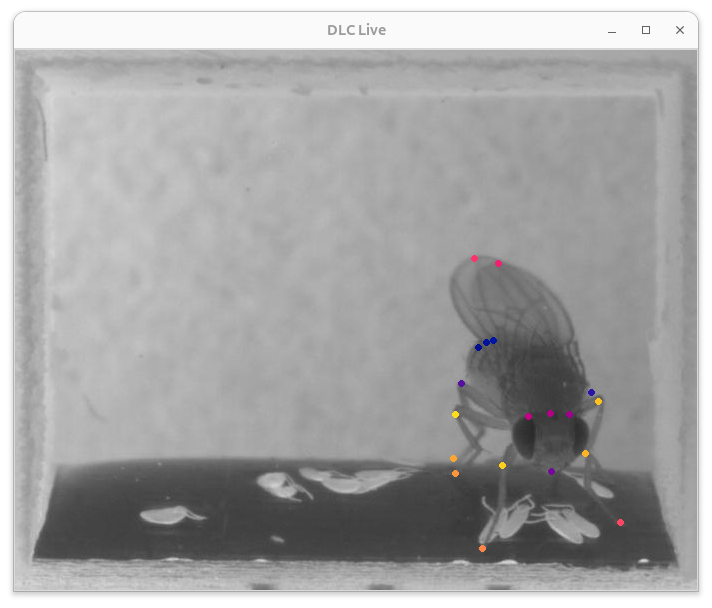

In [19]:
dlc_live.display.destroy()

### DLC Live with snaptshot of DLC 3.0 model (.pt)

In [20]:
# Dikra
dlc_live = DLCLive(
    path="/media/dikra/PhD/DATA/DLC24_Data/dlc-live-dummy",
    snapshot="snapshot-200.pt",
    device="cuda",
    model_type="pytorch",
    display=True,
)

# Anna
# dlc_live = DLCLive(pytorch_cfg="/Users/annastuckert/Documents/DLC_AI_Residency/DLC_AI2024/DeepLabCut-live/Ventral_gait_model/train", processor=dlc_proc, snapshot='/Users/annastuckert/Documents/DLC_AI_Residency/DLC_AI2024/DeepLabCut-live/Ventral_gait_model/train/snapshot-263.pt')
# dlc_live = DLCLive("/Users/annastuckert/Documents/DLC_AI_Residency/DLC_AI2024/DeepLabCut-live/exported DLC model for dlc-live/DLC_dev-single-animal_resnet_50_iteration-1_shuffle-1", processor=dlc_proc)
# img = cv2.imread("/Users/annastuckert/Documents/DLC_AI_Residency/DLC_AI2024/DeepLabCut-live/exported DLC model for dlc-live/img049.png")

pytorch_pose = dlc_live.init_inference(frame=img)
pytorch_pose

/home/dikra/MyHub/Code/DLC24_Hub/DLC_AI2024/DeepLabCut-live/dlclive/dlclive.py:260: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  weights = torch.load(model_path, map_locati

{'poses': tensor([[[[4.6099e+02, 3.0565e+02, 2.2497e-01],
           [4.6334e+02, 2.9737e+02, 5.2393e-01],
           [4.7105e+02, 2.9226e+02, 5.7827e-01],
           [4.7816e+02, 2.9004e+02, 6.5970e-01],
           [5.7700e+02, 3.4287e+02, 6.7695e-01],
           [4.4610e+02, 3.3317e+02, 6.4596e-01],
           [5.3632e+02, 4.2195e+02, 5.4373e-01],
           [4.5563e+02, 3.5570e+02, 2.5123e-01],
           [5.5438e+02, 3.6476e+02, 6.2622e-01],
           [5.3584e+02, 3.6377e+02, 6.4735e-01],
           [5.1307e+02, 3.6640e+02, 6.0587e-01],
           [5.2159e+02, 2.9548e+02, 4.5409e-01],
           [4.8214e+02, 3.8471e+02, 2.4118e-01],
           [4.8334e+02, 2.1336e+02, 7.4011e-01],
           [4.5919e+02, 2.0870e+02, 6.2153e-01],
           [6.0561e+02, 4.7224e+02, 5.8598e-01],
           [5.9742e+02, 4.2868e+02, 4.8355e-01],
           [5.7910e+02, 4.2470e+02, 2.6089e-01],
           [4.6775e+02, 4.9880e+02, 8.5475e-01],
           [4.4069e+02, 4.2392e+02, 6.7025e-01],
           

In [21]:
dlc_live.display.destroy()

![Screenshot from 2024-08-20 14-36-00.png](<attachment:Screenshot from 2024-08-20 14-36-00.png>)
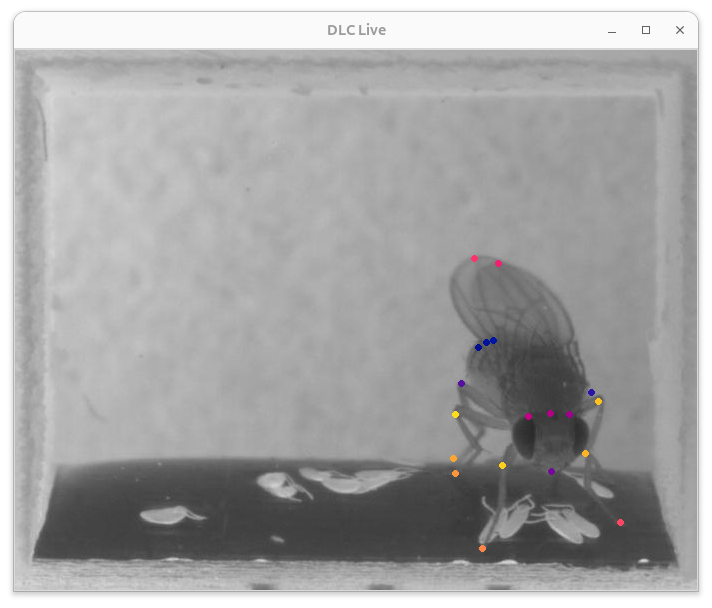

In [21]:
display = Display()
display.set_display(im_size=(540, 682, 3), bodyparts=25)
display.display_frame(img, onnx_pose)

In [22]:
display.destroy()